In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("bank-additional-full-1 (1) (1).csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [4]:
df.shape

(41199, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [7]:
# check null values
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [8]:
# percentage of null values
df.isnull().sum()*100/len(df)

age               0.009709
job               0.012136
marital           0.012136
education         0.012136
default           0.009709
housing           0.007282
loan              0.009709
contact           0.009709
month             0.007282
day_of_week       0.007282
duration          0.007282
campaign          0.007282
pdays             0.007282
previous          0.007282
poutcome          0.012136
emp.var.rate      0.007282
cons.price.idx    0.009709
cons.conf.idx     0.007282
euribor3m         0.007282
nr.employed       0.007282
y                 0.007282
dtype: float64

In [9]:
df.isnull().sum().sum()    # total no of nulls

76

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

**Outliers**

In [13]:
c = df.columns.tolist()
print(c)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


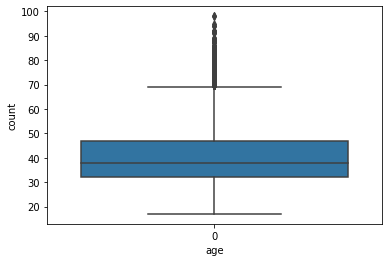

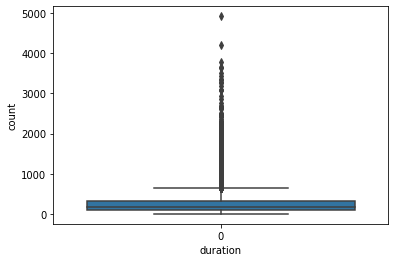

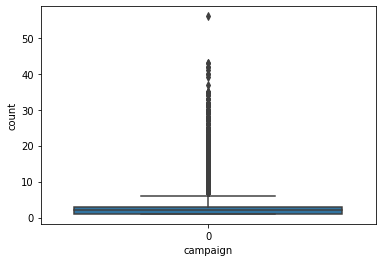

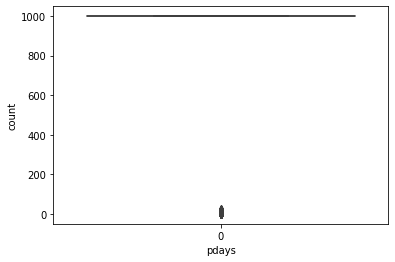

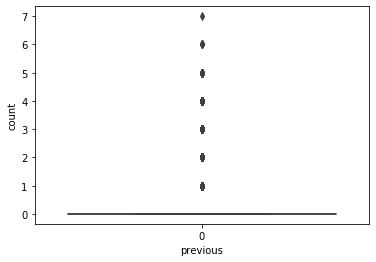

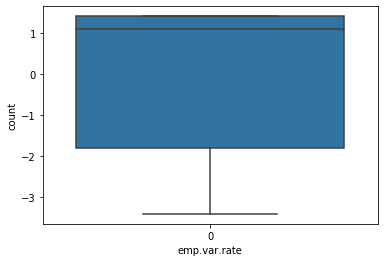

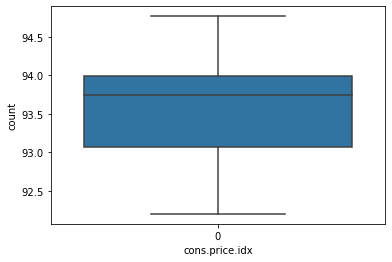

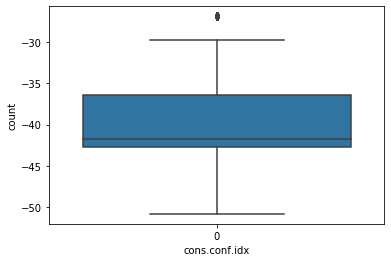

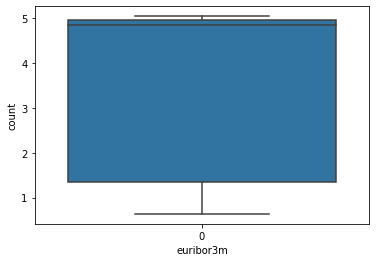

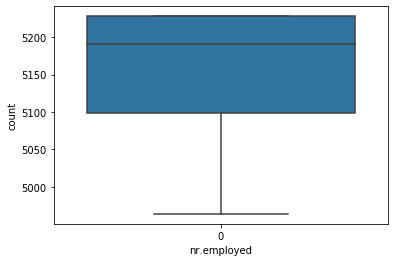

In [14]:
for col in c:
    if(df[col].dtype == 'int64' or df[col].dtype == 'float64'):
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

Text(0, 0.5, 'count')

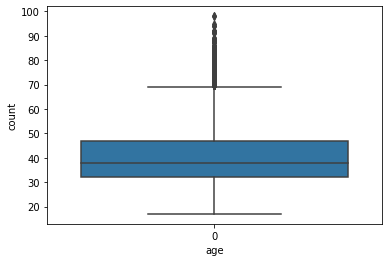

In [15]:
sns.boxplot(df["age"])
plt.xlabel("age")
plt.ylabel("count")

In [16]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
print("q1 = ",q1)
print("q3 =",q3)

q1 =  32.0
q3 = 47.0


In [17]:
iqr = q3-q1
print(iqr)

15.0


In [18]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print("lf = ",lf)
print("uf = ",uf)

lf =  9.5
uf =  69.5


In [19]:
df_samplefilter = df[(df['age'] >= 9.5) & (df['age'] <= 69.5)]

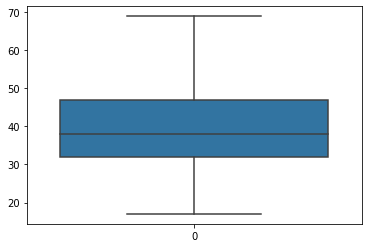

In [20]:
sns.boxplot(df_samplefilter['age'])

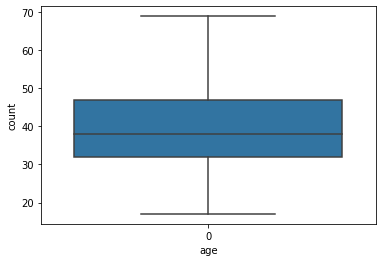

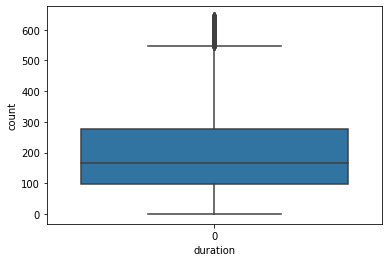

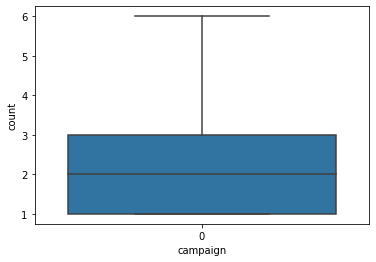

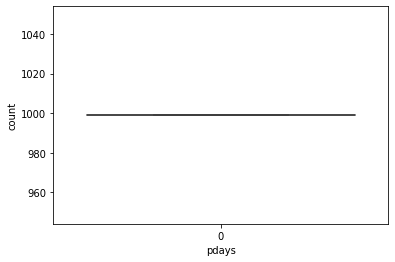

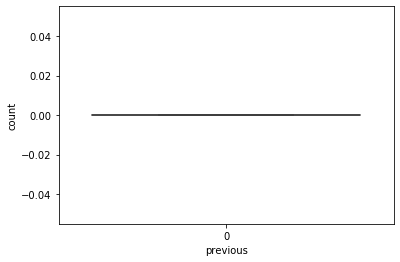

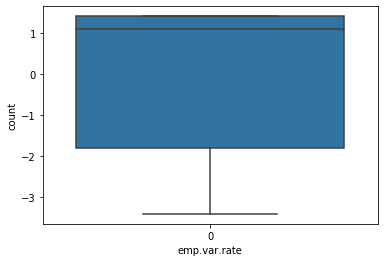

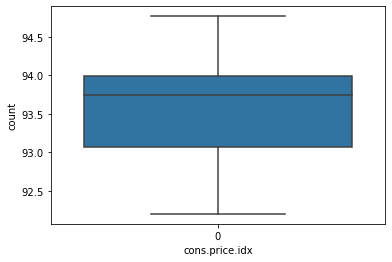

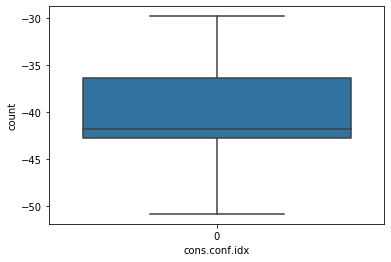

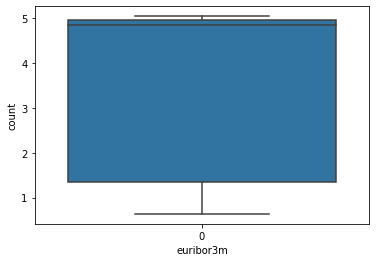

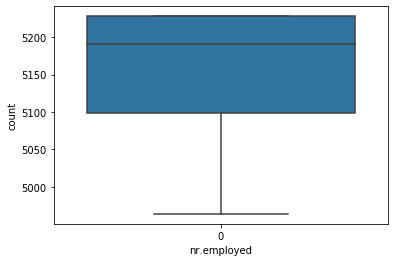

In [21]:
# removing outliers
for col in c:
    if(df[col].dtype == 'int64' or df[col].dtype == 'float64'):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lf = q1 - 1.5*iqr
        uf = q3 + 1.5*iqr
        df_wo_outlier = df[(df[col] >= lf) & (df[col] <= uf)]
        sns.boxplot(df_wo_outlier[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

**Convert Object Data using Label Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
for col in c:
    if(df[col].dtype == 'object'):
        df[col] = le.fit_transform(df[col])
        print(col)
        print(df[col].value_counts())

job
0     10422
1      9254
9      6743
7      3969
4      2924
5      1722
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64
marital
1    24930
2    11568
0     4612
3       80
Name: marital, dtype: int64
education
6    12168
3     9515
2     6045
5     5245
0     4176
1     2292
7     1731
4       18
Name: education, dtype: int64
default
0    32590
1     8597
2        3
Name: default, dtype: int64
housing
2    21578
0    18622
1      990
Name: housing, dtype: int64
loan
0    33952
2     6248
1      990
Name: loan, dtype: int64
contact
0    26146
1    15044
Name: contact, dtype: int64
month
6    13769
3     7174
1     6178
4     5318
7     4103
0     2632
8      718
9      570
5      546
2      182
Name: month, dtype: int64
day_of_week
2    8623
1    8514
4    8134
3    8090
0    7829
Name: day_of_week, dtype: int64
poutcome
1    35563
0     4254
2     1373
Name: poutcome, dtype: int64
y
0    36550
1     4640
Name: y, dtype: int64


In [25]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 41194
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41190 non-null  float64
 1   job             41190 non-null  int32  
 2   marital         41190 non-null  int32  
 3   education       41190 non-null  int32  
 4   default         41190 non-null  int32  
 5   housing         41190 non-null  int32  
 6   loan            41190 non-null  int32  
 7   contact         41190 non-null  int32  
 8   month           41190 non-null  int32  
 9   day_of_week     41190 non-null  int32  
 10  duration        41190 non-null  float64
 11  campaign        41190 non-null  float64
 12  pdays           41190 non-null  float64
 13  previous        41190 non-null  float64
 14  poutcome        41190 non-null  int32  
 15  emp.var.rate    41190 non-null  float64
 16  cons.price.idx  41190 non-null  float64
 17  cons.conf.idx   41190 non-null 

**Multicolinearity**
* **VIF : Numerical data**
* **Chi-Square : Categorical data**

In [27]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,19.725402
1,job,2.120195
2,marital,5.654288
3,education,4.463170
4,default,1.404207
5,housing,2.205720
6,loan,1.207781
7,contact,2.841863
8,month,6.777479
9,day_of_week,3.085325


In [29]:
# removing max vif col i.e. nr.employed
df = df.drop(['nr.employed'], axis=1)

In [30]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,19.674237
1,job,2.119956
2,marital,5.653086
3,education,4.462602
4,default,1.400954
5,housing,2.205276
6,loan,1.207721
7,contact,2.394698
8,month,5.777127
9,day_of_week,3.084885


In [31]:
df = df.drop(['cons.price.idx'], axis=1)

In [32]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,18.504794
1,job,2.113939
2,marital,5.504502
3,education,4.413060
4,default,1.400927
5,housing,2.203736
6,loan,1.207344
7,contact,2.313254
8,month,5.740927
9,day_of_week,3.070929


In [33]:
df = df.drop(['euribor3m'], axis=1)

In [34]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,17.907179
1,job,2.112831
2,marital,5.472524
3,education,4.370316
4,default,1.400798
5,housing,2.201957
6,loan,1.207232
7,contact,2.308277
8,month,5.275219
9,day_of_week,3.060645


In [35]:
df = df.drop(['cons.conf.idx'], axis=1)

In [36]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,17.905769
1,job,2.112228
2,marital,5.453155
3,education,4.359722
4,default,1.399621
5,housing,2.199455
6,loan,1.206695
7,contact,2.232136
8,month,5.248416
9,day_of_week,3.060636


In [37]:
df = df.drop(['pdays'], axis=1)

In [38]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,9.737618
1,job,2.096449
2,marital,4.261773
3,education,4.051262
4,default,1.398189
5,housing,2.152097
6,loan,1.202958
7,contact,2.230184
8,month,4.854380
9,day_of_week,2.952474


In [39]:
df = df.drop(['age'], axis=1)

In [40]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,job,2.062538
1,marital,4.247303
2,education,3.894951
3,default,1.318477
4,housing,2.099243
5,loan,1.199378
6,contact,2.228611
7,month,4.566344
8,day_of_week,2.854227
9,duration,1.938412


In [41]:
df = df.drop(['poutcome'], axis=1)

In [42]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,job,2.034860
1,marital,3.990816
2,education,3.640209
3,default,1.304656
4,housing,2.058004
5,loan,1.196474
6,contact,2.213124
7,month,4.382337
8,day_of_week,2.744344
9,duration,1.880826


In [43]:
vif_data['features']

0              job
1          marital
2        education
3          default
4          housing
5             loan
6          contact
7            month
8      day_of_week
9         duration
10        campaign
11        previous
12    emp.var.rate
Name: features, dtype: object

**9-June-2024**

**Model Building**

**Splitting Data**

In [44]:
# after removing multicolinear columns using vif
x.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate'],
      dtype='object')

In [45]:
x.head(2)                            # independent variables

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1


In [46]:
y = df['y']                         # dependent variable
y

0        0
1        0
2        0
3        0
4        0
        ..
41185    0
41186    1
41187    0
41193    0
41194    0
Name: y, Length: 41190, dtype: int32

In [47]:
y.value_counts()

0    36550
1     4640
Name: y, dtype: int64

In [48]:
# Splitting data
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [50]:
# Standardization - standard scaling
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [54]:
# Model Building
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
ypred = lr.predict(xtest)

In [58]:
# Model Evaluation
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(ypred, ytest)

0.8977471353660905

**Chi-Square Test**
- to find multicolinearity in categorical variables

In [1]:
import scipy.stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [5]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
col_list = df.columns.tolist()
col_list.remove('y')
data = pd.DataFrame(columns = ['features', 'pvalue'])

for col in col_list:
    if df[col].dtype == 'object':
        
        
        # observed value
        dataset_table = pd.crosstab(df[col], df['y'])
        observed_values = dataset_table.values
        
        # expected value
        val = chi2_contingency(dataset_table)
        expected_values = val[3]
        
        # Chi Square Static
        chi_square = sum([(o-e)**2/e for o,e in zip(observed_values, expected_values)])
        chi_square_static = chi_square[0] + chi_square[1]
        
        # Critical value
        no_of_rows = len(dataset_table.iloc[0:,0])
        no_of_columns = len(dataset_table.iloc[0,0:])
        ddof = (no_of_rows - 1)*(no_of_columns - 1)
        alpha = 0.05
        critical_value = scipy.stats.chi2.ppf(q=1-alpha, df=ddof)
        
        # p value
        p_value = 1 - chi2.cdf(x=chi_square_static, df=ddof)
        
        # ---------------------------------------------------------------
        
        data = pd.concat([data, pd.DataFrame({'features': [col], 'pvalue': [p_value]})], ignore_index=True)
        
data        

,features,pvalue
0,job,0.000000
1,marital,0.000000
2,education,0.000000
3,default,0.000000
4,housing,0.060180
5,loan,0.582054
6,contact,0.000000
7,month,0.000000
8,day_of_week,0.000028
9,poutcome,0.000000


In [8]:
# Note: p > alpha, drop col